## Import

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import chain

# for reading and displaying images
# from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.architectures.resnet import *
from src.architectures.levakov_96 import *
from src.architectures.inception import *
from src.architectures.dinsdale import *

from src.run import *

from torch.optim import *
import torch.optim as optim
from torchsummary import summary
from tensorboardX import SummaryWriter

## Dataloader
for kFold, it will be run again on the run

In [2]:
from src.dataloader import *

train_dset = MyDataset(task_type='age')
test_dset = MyDataset(task_type='age', test=True)

train_loader = DataLoader(train_dset, batch_size=8)
test_loader = DataLoader(test_dset, batch_size=8)

## Load Model

In [3]:
def load_model(model, verbose=True):
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(f'Model {model.capitalize()} is selected.')

    if model == 'resnet':
        

        opt = Option()
        model = generate_model(model_depth=opt.model_depth,
                                    n_classes=opt.n_classes,
                                    n_input_channels=opt.n_input_channels,
                                    shortcut_type=opt.shortcut_type,
                                    conv1_t_size=opt.conv1_t_size,
                                    conv1_t_stride=opt.conv1_t_stride,
                                    no_max_pool=opt.no_max_pool,
                                    widen_factor=opt.resnet_widen_factor)

    elif model == 'levakov':
        model = Levakov(task_type='age')

    elif model == 'inception':
        model = Inception3()

    elif model == 'dinsdale':
        model = Dinsdale(1, 1, 2)

    else: return None

    model.to(device)
    if verbose:
        print(summary(model, input_size=(1, 96, 96, 96)))
    
    return model, device

model = 'resnet'
# model, device = load_model('dinsdale')

## Setups

Default Settings

In [4]:
task_type = 'age' # no longer used.
resize = True
scheduler = False
epochs = range(100)
folds = range(10)

Loss & Optimizer

In [5]:
from src.losses import RMSELoss

loss_fn = nn.MSELoss()
lamb = 0.0005
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

Metrics

In [6]:
rmse_fn = RMSELoss()
mae_fn = nn.L1Loss()

## Run

### kFold Run

Model Resnet is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 48, 48]           2,352
       BatchNorm3d-2       [-1, 16, 96, 48, 48]              32
              ReLU-3       [-1, 16, 96, 48, 48]               0
         MaxPool3d-4       [-1, 16, 48, 24, 24]               0
            Conv3d-5       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-6       [-1, 16, 48, 24, 24]              32
              ReLU-7       [-1, 16, 48, 24, 24]               0
            Conv3d-8       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-9       [-1, 16, 48, 24, 24]              32
             ReLU-10       [-1, 16, 48, 24, 24]               0
       BasicBlock-11       [-1, 16, 48, 24, 24]               0
           Conv3d-12       [-1, 32, 24, 12, 12]          13,824
      BatchNorm3d-13       [-1, 32, 24, 12, 12]              64
             

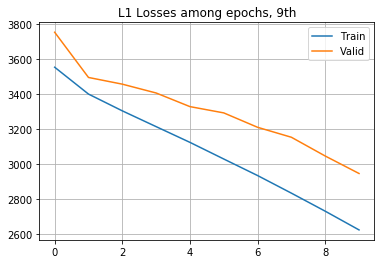

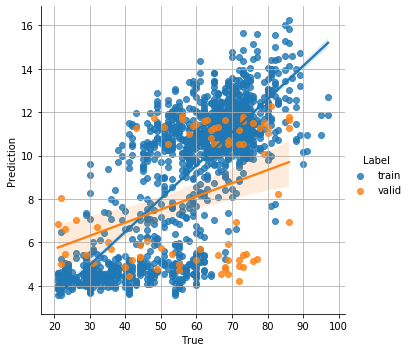

FOLD 0 - EPOCHS 10
MAE  :: [TRAIN] 48.231   | [VALID] 50.513
MSE  :: [TRAIN] 2517.163 | [VALID] 2816.335
RMSE :: [TRAIN] 50.024  | [VALID] 53.009
CORR :: [TRAIN] 0.781 | [VALID] 0.465
FOLD 0 - EPOCHS 11
MAE  :: [TRAIN] 47.106   | [VALID] 49.554
FOLD 0 - EPOCHS 12
MAE  :: [TRAIN] 45.948   | [VALID] 47.713
FOLD 0 - EPOCHS 13
MAE  :: [TRAIN] 44.766   | [VALID] 47.388
FOLD 0 - EPOCHS 14
MAE  :: [TRAIN] 43.549   | [VALID] 46.166
FOLD 0 - EPOCHS 15
MAE  :: [TRAIN] 42.329   | [VALID] 44.545
MSE  :: [TRAIN] 1945.114 | [VALID] 2207.917
RMSE :: [TRAIN] 43.933  | [VALID] 46.898
CORR :: [TRAIN] 0.836 | [VALID] 0.608
FOLD 0 - EPOCHS 16
MAE  :: [TRAIN] 41.089   | [VALID] 40.007
FOLD 0 - EPOCHS 17
MAE  :: [TRAIN] 39.908   | [VALID] 43.744
FOLD 0 - EPOCHS 18
MAE  :: [TRAIN] 38.552   | [VALID] 38.556
FOLD 0 - EPOCHS 19
MAE  :: [TRAIN] 37.253   | [VALID] 37.859


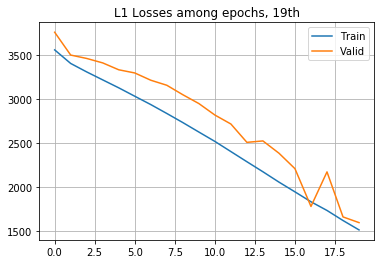

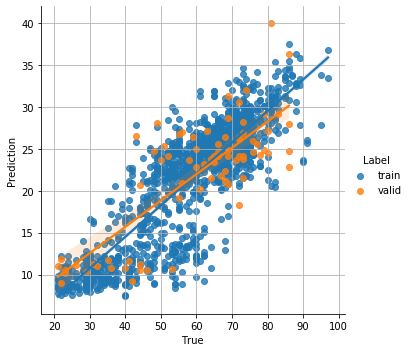

FOLD 0 - EPOCHS 20
MAE  :: [TRAIN] 35.954   | [VALID] 38.441
MSE  :: [TRAIN] 1411.643 | [VALID] 1670.452
RMSE :: [TRAIN] 37.367  | [VALID] 40.733
CORR :: [TRAIN] 0.868 | [VALID] 0.672
FOLD 0 - EPOCHS 21
MAE  :: [TRAIN] 34.694   | [VALID] 39.346
FOLD 0 - EPOCHS 22
MAE  :: [TRAIN] 33.370   | [VALID] 37.066
FOLD 0 - EPOCHS 23
MAE  :: [TRAIN] 32.117   | [VALID] 35.580
FOLD 0 - EPOCHS 24
MAE  :: [TRAIN] 30.806   | [VALID] 33.896
FOLD 0 - EPOCHS 25
MAE  :: [TRAIN] 29.506   | [VALID] 30.125
MSE  :: [TRAIN] 961.438 | [VALID] 1050.942
RMSE :: [TRAIN] 30.754  | [VALID] 32.286
CORR :: [TRAIN] 0.900 | [VALID] 0.752
FOLD 0 - EPOCHS 26
MAE  :: [TRAIN] 28.282   | [VALID] 27.378
FOLD 0 - EPOCHS 27
MAE  :: [TRAIN] 27.009   | [VALID] 27.073
FOLD 0 - EPOCHS 28
MAE  :: [TRAIN] 25.761   | [VALID] 25.264
FOLD 0 - EPOCHS 29
MAE  :: [TRAIN] 24.512   | [VALID] 24.604


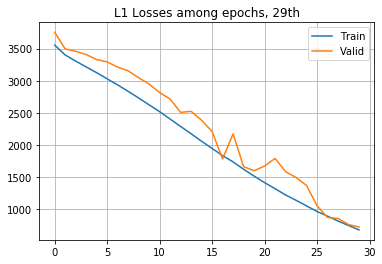

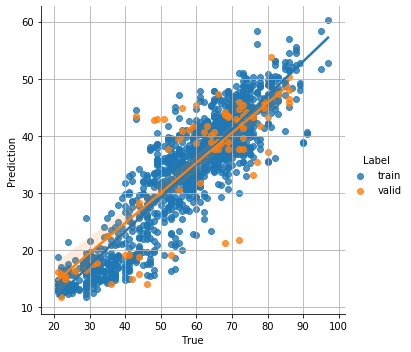

FOLD 0 - EPOCHS 30
MAE  :: [TRAIN] 23.299   | [VALID] 24.587
MSE  :: [TRAIN] 615.763 | [VALID] 721.509
RMSE :: [TRAIN] 24.515  | [VALID] 26.784
CORR :: [TRAIN] 0.913 | [VALID] 0.798
FOLD 0 - EPOCHS 31
MAE  :: [TRAIN] 22.058   | [VALID] 20.883
FOLD 0 - EPOCHS 32
MAE  :: [TRAIN] 20.857   | [VALID] 22.850
FOLD 0 - EPOCHS 33
MAE  :: [TRAIN] 19.614   | [VALID] 19.977
FOLD 0 - EPOCHS 34
MAE  :: [TRAIN] 18.562   | [VALID] 17.291
FOLD 0 - EPOCHS 35
MAE  :: [TRAIN] 17.326   | [VALID] 15.671
MSE  :: [TRAIN] 362.775 | [VALID] 336.842
RMSE :: [TRAIN] 18.651  | [VALID] 18.284
CORR :: [TRAIN] 0.913 | [VALID] 0.633
FOLD 0 - EPOCHS 36
MAE  :: [TRAIN] 16.163   | [VALID] 14.873
FOLD 0 - EPOCHS 37
MAE  :: [TRAIN] 15.151   | [VALID] 13.150
FOLD 0 - EPOCHS 38
MAE  :: [TRAIN] 14.112   | [VALID] 15.459
FOLD 0 - EPOCHS 39
MAE  :: [TRAIN] 13.118   | [VALID] 14.831


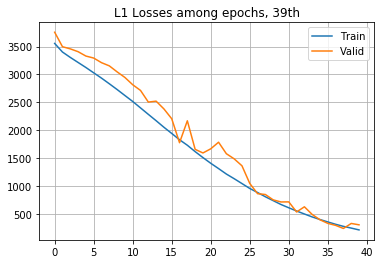

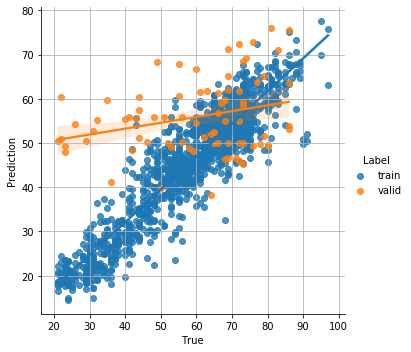

FOLD 0 - EPOCHS 40
MAE  :: [TRAIN] 12.404   | [VALID] 12.890
MSE  :: [TRAIN] 201.459 | [VALID] 239.136
RMSE :: [TRAIN] 13.717  | [VALID] 15.381
CORR :: [TRAIN] 0.922 | [VALID] 0.562
FOLD 0 - EPOCHS 41
MAE  :: [TRAIN] 11.376   | [VALID] 11.336
FOLD 0 - EPOCHS 42
MAE  :: [TRAIN] 10.700   | [VALID] 10.627
FOLD 0 - EPOCHS 43
MAE  :: [TRAIN] 9.810   | [VALID] 10.881
FOLD 0 - EPOCHS 44
MAE  :: [TRAIN] 9.277   | [VALID] 9.817
FOLD 0 - EPOCHS 45
MAE  :: [TRAIN] 8.496   | [VALID] 10.395
MSE  :: [TRAIN] 103.784 | [VALID] 163.045
RMSE :: [TRAIN] 9.694  | [VALID] 12.710
CORR :: [TRAIN] 0.932 | [VALID] 0.732
FOLD 0 - EPOCHS 46
MAE  :: [TRAIN] 7.877   | [VALID] 9.649
FOLD 0 - EPOCHS 47
MAE  :: [TRAIN] 7.664   | [VALID] 9.851
FOLD 0 - EPOCHS 48
MAE  :: [TRAIN] 7.073   | [VALID] 9.244
FOLD 0 - EPOCHS 49
MAE  :: [TRAIN] 6.770   | [VALID] 11.193


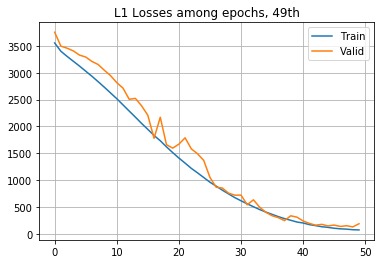

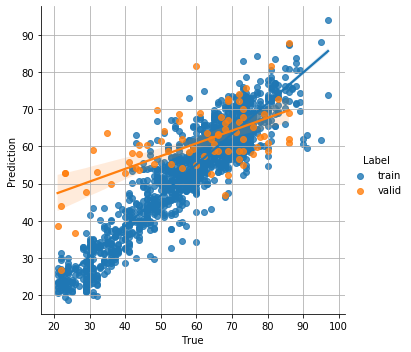

FOLD 0 - EPOCHS 50
MAE  :: [TRAIN] 6.260   | [VALID] 10.987
MSE  :: [TRAIN] 61.974 | [VALID] 185.634
RMSE :: [TRAIN] 7.479  | [VALID] 13.591
CORR :: [TRAIN] 0.933 | [VALID] 0.648
FOLD 0 - EPOCHS 51
MAE  :: [TRAIN] 6.062   | [VALID] 10.964
FOLD 0 - EPOCHS 52
MAE  :: [TRAIN] 5.787   | [VALID] 10.707
FOLD 0 - EPOCHS 53
MAE  :: [TRAIN] 5.648   | [VALID] 10.392
FOLD 0 - EPOCHS 54
MAE  :: [TRAIN] 5.591   | [VALID] 10.514
FOLD 0 - EPOCHS 55
MAE  :: [TRAIN] 5.555   | [VALID] 9.132
MSE  :: [TRAIN] 51.597 | [VALID] 126.448
RMSE :: [TRAIN] 6.855  | [VALID] 11.143
CORR :: [TRAIN] 0.930 | [VALID] 0.772
FOLD 0 - EPOCHS 56
MAE  :: [TRAIN] 5.231   | [VALID] 10.500
FOLD 0 - EPOCHS 57
MAE  :: [TRAIN] 5.385   | [VALID] 8.743
FOLD 0 - EPOCHS 58
MAE  :: [TRAIN] 5.183   | [VALID] 8.954
FOLD 0 - EPOCHS 59
MAE  :: [TRAIN] 5.063   | [VALID] 9.218


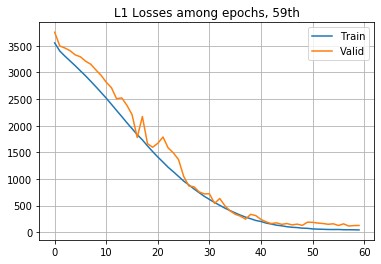

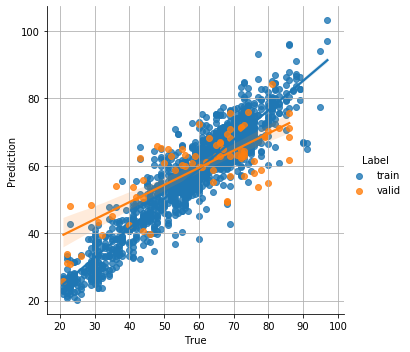

FOLD 0 - EPOCHS 60
MAE  :: [TRAIN] 4.955   | [VALID] 10.794
MSE  :: [TRAIN] 41.664 | [VALID] 174.504
RMSE :: [TRAIN] 6.222  | [VALID] 13.169
CORR :: [TRAIN] 0.938 | [VALID] 0.690
FOLD 0 - EPOCHS 61
MAE  :: [TRAIN] 5.147   | [VALID] 8.201
FOLD 0 - EPOCHS 62
MAE  :: [TRAIN] 5.140   | [VALID] 10.041
FOLD 0 - EPOCHS 63
MAE  :: [TRAIN] 5.152   | [VALID] 10.533
FOLD 0 - EPOCHS 64
MAE  :: [TRAIN] 5.122   | [VALID] 8.551
FOLD 0 - EPOCHS 65
MAE  :: [TRAIN] 5.170   | [VALID] 9.664
MSE  :: [TRAIN] 43.829 | [VALID] 143.848
RMSE :: [TRAIN] 6.400  | [VALID] 11.969
CORR :: [TRAIN] 0.937 | [VALID] 0.763
FOLD 0 - EPOCHS 66
MAE  :: [TRAIN] 5.092   | [VALID] 9.262
FOLD 0 - EPOCHS 67
MAE  :: [TRAIN] 5.193   | [VALID] 7.611
FOLD 0 - EPOCHS 68
MAE  :: [TRAIN] 5.061   | [VALID] 8.898
FOLD 0 - EPOCHS 69
MAE  :: [TRAIN] 4.931   | [VALID] 8.674


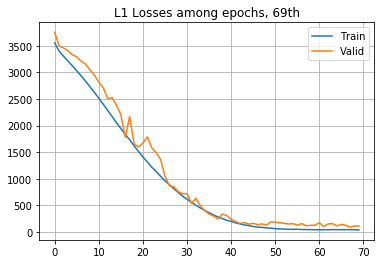

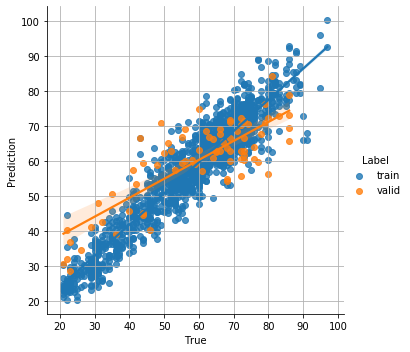

FOLD 0 - EPOCHS 70
MAE  :: [TRAIN] 4.846   | [VALID] 7.923
MSE  :: [TRAIN] 39.642 | [VALID] 95.797
RMSE :: [TRAIN] 6.061  | [VALID] 9.761
CORR :: [TRAIN] 0.942 | [VALID] 0.840
FOLD 0 - EPOCHS 71
MAE  :: [TRAIN] 4.906   | [VALID] 9.170
FOLD 0 - EPOCHS 72
MAE  :: [TRAIN] 4.758   | [VALID] 8.491
FOLD 0 - EPOCHS 73
MAE  :: [TRAIN] 4.859   | [VALID] 8.258
FOLD 0 - EPOCHS 74
MAE  :: [TRAIN] 4.829   | [VALID] 7.939
FOLD 0 - EPOCHS 75
MAE  :: [TRAIN] 4.785   | [VALID] 8.198
MSE  :: [TRAIN] 39.128 | [VALID] 101.272
RMSE :: [TRAIN] 6.087  | [VALID] 9.991
CORR :: [TRAIN] 0.944 | [VALID] 0.825
FOLD 0 - EPOCHS 76
MAE  :: [TRAIN] 4.778   | [VALID] 10.367
FOLD 0 - EPOCHS 77
MAE  :: [TRAIN] 4.788   | [VALID] 8.180
FOLD 0 - EPOCHS 78
MAE  :: [TRAIN] 4.649   | [VALID] 10.014
FOLD 0 - EPOCHS 79
MAE  :: [TRAIN] 4.712   | [VALID] 9.796


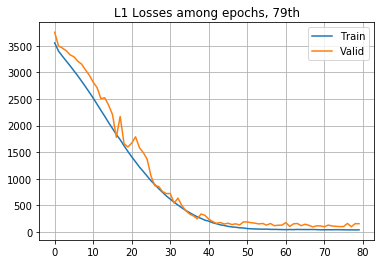

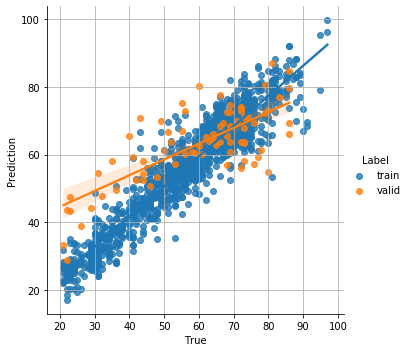

FOLD 0 - EPOCHS 80
MAE  :: [TRAIN] 4.616   | [VALID] 9.185
MSE  :: [TRAIN] 34.721 | [VALID] 131.205
RMSE :: [TRAIN] 5.727  | [VALID] 11.384
CORR :: [TRAIN] 0.949 | [VALID] 0.781
FOLD 0 - EPOCHS 81
MAE  :: [TRAIN] 4.699   | [VALID] 11.318
FOLD 0 - EPOCHS 82
MAE  :: [TRAIN] 4.596   | [VALID] 10.196
FOLD 0 - EPOCHS 83
MAE  :: [TRAIN] 4.831   | [VALID] 9.529
FOLD 0 - EPOCHS 84
MAE  :: [TRAIN] 4.713   | [VALID] 8.903
FOLD 0 - EPOCHS 85
MAE  :: [TRAIN] 4.764   | [VALID] 9.619
MSE  :: [TRAIN] 38.761 | [VALID] 140.559
RMSE :: [TRAIN] 6.051  | [VALID] 11.806
CORR :: [TRAIN] 0.947 | [VALID] 0.745
FOLD 0 - EPOCHS 86
MAE  :: [TRAIN] 4.666   | [VALID] 9.607
FOLD 0 - EPOCHS 87
MAE  :: [TRAIN] 4.385   | [VALID] 8.693
FOLD 0 - EPOCHS 88
MAE  :: [TRAIN] 4.388   | [VALID] 8.283
FOLD 0 - EPOCHS 89
MAE  :: [TRAIN] 4.410   | [VALID] 10.227


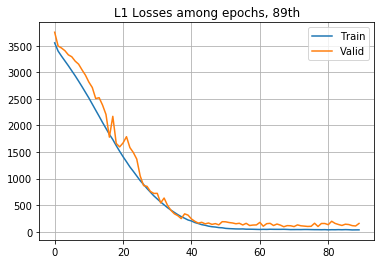

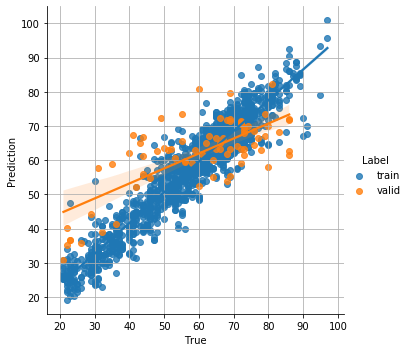

FOLD 0 - EPOCHS 90
MAE  :: [TRAIN] 4.589   | [VALID] 8.830
MSE  :: [TRAIN] 35.663 | [VALID] 124.180
RMSE :: [TRAIN] 5.834  | [VALID] 11.090
CORR :: [TRAIN] 0.948 | [VALID] 0.778
FOLD 0 - EPOCHS 91
MAE  :: [TRAIN] 4.586   | [VALID] 10.943
FOLD 0 - EPOCHS 92
MAE  :: [TRAIN] 4.733   | [VALID] 10.141
FOLD 0 - EPOCHS 93
MAE  :: [TRAIN] 4.363   | [VALID] 9.112
FOLD 0 - EPOCHS 94
MAE  :: [TRAIN] 4.695   | [VALID] 9.168
FOLD 0 - EPOCHS 95
MAE  :: [TRAIN] 4.580   | [VALID] 8.524
MSE  :: [TRAIN] 35.009 | [VALID] 120.523
RMSE :: [TRAIN] 5.755  | [VALID] 10.869
CORR :: [TRAIN] 0.953 | [VALID] 0.788
FOLD 0 - EPOCHS 96
MAE  :: [TRAIN] 4.640   | [VALID] 8.993
FOLD 0 - EPOCHS 97
MAE  :: [TRAIN] 4.299   | [VALID] 9.515
FOLD 0 - EPOCHS 98
MAE  :: [TRAIN] 4.207   | [VALID] 9.846
FOLD 0 - EPOCHS 99
MAE  :: [TRAIN] 4.227   | [VALID] 8.265


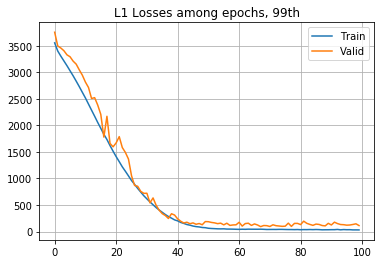

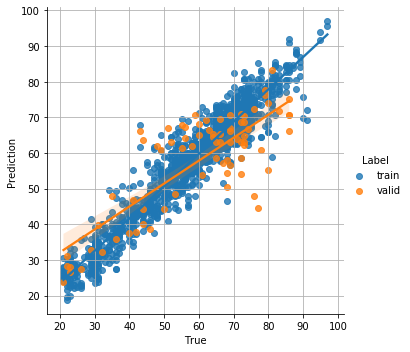

TypeError: eval() missing 2 required positional arguments: 'maes' and 'rmses'

In [7]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

val_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_losses, tst_maes, tst_rmses = [], [], []
for fold in folds:
    
    model_name = 'resnet'
    model, device = load_model(model_name)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    
    trn_losses, val_losses = [], []
    trn_maes, val_maes = [], []
    trn_rmses, val_rmses = [], []
    
    aug_losses, aug_maes, aug_rmses = [], [], []
    
    for e in epochs:

        model, (trn_losses, trn_maes, trn_rmses), trn_preds = train(model, False, None, fold, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              trn_losses, trn_maes, trn_rmses,
                                                              optimizer, scheduler, lamb)
        
        model, (aug_losses, aug_maes, aug_rmses), aug_preds = train(model, False, True, fold, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              aug_losses, aug_maes, aug_rmses,
                                                              optimizer, scheduler, lamb)
        
        model, (val_losses, val_maes, val_rmses), val_preds =  eval(model, True, None, fold, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              val_losses, val_maes, val_rmses)


        # SUM UP RESLUTS
        trn_df = make_df(trn_preds, 'train')
        val_df = make_df(val_preds, 'valid')
        aug_df = make_df(aug_preds, 'train')
        reg_df = pd.concat([trn_df, val_df, aug_df], ignore_index=True)

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        val_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        
        print(f'FOLD {fold} - EPOCHS {e}')
        print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {val_maes[-1]:.3f}')
        if e % 5 == 0:
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {val_losses[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {val_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {val_corr:.3f}\n')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(val_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    torch.save(model, f'./models/{model_name}_1222_{fold}_{e}_{trn_losses[-1]}.pth')
    
    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    val_fold['MSE'].append(val_losses)
    val_fold['MAE'].append(val_maes)
    val_fold['RMSE'].append(val_rmses)
    val_fold['Correlation'].append(val_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    model, (tst_losses, tst_maes, tst_rmses), tst_preds = eval(model, test_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              tst_losses, tst_maes, tst_rmses)

    tst_df = make_df(tst_preds, 'test')
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    
    print(f'FOLD {fold}', end='')
    print(f'MSE  :: [TEST] {tst_losses[-1]:.3f}')
    print(f'MAE  :: [TEST] {tst_maes[-1]:.3f}')
    print(f'RMSE :: [TEST] {tst_rmses[-1]:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')
    
    torch.save(model, f'./models/{model_name}_{tst_maes[-1]}.pth')

    sns_plot = sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    sns_plot.savefig(f'{fold}.png')
    plt.grid()
    plt.show()
    
    del model
    torch.cuda.empty_cache()

In [ ]:
    sns_plot = sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    sns_plot.savefig(f'{fold}.png')
    plt.grid()
    plt.show()

In [ ]:
model

In [8]:
torch.save(model, 'model.pth')
# model= torch.load('model_scale.pth')

FileNotFoundError: [Errno 2] No such file or directory: 'model_scale.pth'

In [ ]:
import nibabel as nib
from utils.guided_backprop import GuidedBackprop

_ = model.eval()

# Remove LogSoftmax
model.layer4 = nn.Sequential(*list(model.layer4.children())[:-1])

GBP = GuidedBackprop(model)

inputs, label = x.permute(3, 0, 1, 2), torch.BoolTensor(0)
input_img = nn.Parameter(torch.FloatTensor(inputs).unsqueeze(0), requires_grad=True).to(device)

guided_grads = GBP.generate_gradients(input_img, label)

export_gradient = np.zeros((3,75,93,81))
export_gradient[:, 8:-8, 8:-8, :-10] = guided_grads
nifti_img = nib.Nifti1Image(export_gradient.transpose(1, 2, 3, 0), np.eye(4))
nifti_img = nib.Nifti1Image(guided_grads.transpose(1, 2, 3, 0), np.eye(4))
nifti_img.to_filename('vis_tmp.nii.gz')

nib.load('vis_tmp.nii.gz').get_data()[[nib.load('vis_tmp.nii.gz').get_fdata() != 0]]

In [ ]:
# best_loss = 10

# trn_fold_losses, tst_fold_losses = [], []
# trn_fold_corrs, tst_fold_corrs = [], []

# trn_fold = {
#     'MSE': list(),
#     'MAE': list(),
#     'RMSE': list(),
#     'Correlation': list()
# }

# tst_fold = {
#     'MSE': list(),
#     'MAE': list(),
#     'RMSE': list(),
#     'Correlation': list()
# }

# for fold in folds:
    
#     train_dset = MyDataset(task_type='age', fold=fold)
#     test_dset = MyDataset(task_type='age', test=True, fold=fold)

#     train_loader = DataLoader(train_dset, batch_size=8)
#     test_loader = DataLoader(test_dset, batch_size=8)
    
#     trn_losses, tst_losses = [], []
#     trn_maes, tst_maes = [], []
#     trn_rmses, tst_rmses = [], []
#     for e in epochs:

#         # TRAIN
#         trn_bth_loss, trn_bth_mae, trn_bth_rmse = 0, 0, 0
#         trn_trues, trn_preds = [], []
#         model.train()
#         for i, (x, y) in enumerate(train_loader):

#             if resize:
#                 x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#             else:
#                 x, y = x.to(device), y.to(device)

#             optimizer.zero_grad()

#             y_pred = model.forward(x).to(device)

#             trn_trues.append(y.to('cpu'))
#             trn_preds.append(y_pred.to('cpu'))

#             # Loss
#             loss = loss_fn(y_pred.squeeze(1), y)
            
#             # Metrics
#             mae = mae_fn(y_pred.squeeze(1), y)
#             rmse = rmse_fn(y_pred.squeeze(1), y)
            
#             del x, y, y_pred

#             loss.backward()
#             optimizer.step()
#             if scheduler: scheduler.step()

#             trn_bth_loss += loss.item()
#             trn_bth_mae  += loss.item()
#             trn_bth_rmse += loss.item()

#         torch.cuda.empty_cache()

#         ### loss
#         trn_losses.append(trn_bth_loss / len(train_loader))
#         trn_maes.append(trn_bth_mae / len(train_loader))
#         trn_rmses.append(trn_bth_rmse / len(train_loader))

#         ### collect trues/predictions
#         trn_trues = list(chain(*trn_trues))
#         trn_preds = list(chain(*trn_preds))

        
#         # VALID
#         tst_bth_loss, tst_bth_mae, tst_bth_rmse = 0, 0, 0
#         model.eval()
#         tst_trues, tst_preds = [], []
#         with torch.no_grad(): # to not give loads on GPU... :(
#             for i, (x, y) in enumerate(test_loader):
#                 if resize:
#                     x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#                 else:
#                     x, y = x.to(device), y.to(device)

#                 y_pred = model.forward(x).to(device)

#                 tst_trues.append(y.to('cpu'))
#                 tst_preds.append(y_pred.to('cpu'))

#                 # Loss
#                 loss = loss_fn(y_pred.squeeze(1), y)
                
#                 # Metrics
#                 mae = mae_fn(y_pred.squeeze(1), y)
#                 rmse = rmse_fn(y_pred.squeeze(1), y)
                
#                 del x, y, y_pred

#                 tst_bth_loss += loss.item()
#                 tst_bth_mae  += loss.item()
#                 tst_bth_rmse += loss.item()
                
#         torch.cuda.empty_cache()
        
#         ### loss
#         tst_losses.append(tst_bth_loss / len(test_loader))
#         tst_maes.append(tst_bth_mae / len(test_loader))
#         tst_rmses.append(tst_bth_rmse / len(test_loader))

#         ### collect trues/predictions
#         tst_trues = list(chain(*tst_trues))
#         tst_preds = list(chain(*tst_preds))

        
#         # SUM UP RESLUTS
#         reg_df = pd.DataFrame({
#             'True': list(map(float, trn_trues + tst_trues)),
#             'Prediction': list(map(float, trn_preds + tst_preds)),
#             'Label': ['train'] * len(trn_trues) + ['valid'] * len(tst_trues)
#         })

#         trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
#         tst_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

#         if e % 5 == 0:
#             print(f'FOLD {fold} - EPOCHS {e}')
#             print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
#             print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {tst_maes[-1]:.3f}')
#             print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {tst_rmses[-1]:.3f}')
#             print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')

#         if e % 10 == 9:
#             plt.title(f"L1 Losses among epochs, {e}th")
#             plt.plot(trn_losses, label='Train')
#             plt.plot(tst_losses, label='Valid')
#             plt.grid(); plt.legend()
            
#             sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
#             plt.grid()
#             plt.show()
    
#     trn_fold['MSE'].append(trn_losses)
#     trn_fold['MAE'].append(trn_maes)
#     trn_fold['RMSE'].append(trn_rmses)
#     trn_fold['Correlation'].append(trn_corr)
    
#     tst_fold['MSE'].append(tst_losses)
#     tst_fold['MAE'].append(tst_maes)
#     tst_fold['RMSE'].append(tst_rmses)
#     tst_fold['Correlation'].append(tst_corr)
    
#     # TEST
#     test_dset = MyDataset(task_type='age', test=True)
#     test_loader = DataLoader(test_dset, batch_size=8)
    
#     tst_bth_loss = 0
#     model.eval()
#     tst_trues, tst_preds = [], []
#     with torch.no_grad(): # to not give loads on GPU... :(
#         for i, (x, y) in enumerate(test_loader):
#             if resize:
#                 x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#             else:
#                 x, y = x.to(device), y.to(device)

#             y_pred = model.forward(x).to(device)

#             tst_trues.append(y.to('cpu'))
#             tst_preds.append(y_pred.to('cpu'))

#             loss = loss_fn(y_pred.squeeze(1), y)
            
#             mae = mae_fn(y_pred.squeeze(1), y)
#             rmse = rmse_fn(y_pred.squeeze(1), y)
#             del x, y, y_pred

#             tst_bth_loss += loss.item()

#     torch.cuda.empty_cache()
#     ### loss
#     tst_loss = tst_bth_loss / len(test_loader)

#     ### collect trues/predictions
#     tst_trues = list(chain(*tst_trues))
#     tst_preds = list(chain(*tst_preds))
    
#     tst_df = pd.DataFrame({
#         'True': list(map(float, tst_trues)),
#         'Prediction': list(map(float, tst_preds)),
#         'Label': ['test'] * len(tst_trues)
#     })
#     reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

#     tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
#     print(f'FOLD {fold}', end='')
#     print(f'RMSE :: [TEST] {tst_loss:.3f}')
#     print(f'CORR :: [TEST] {tst_corr:.3f}')

#     sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
#     plt.grid()
#     plt.show()